# 📘 Section 0 – Machine Learning Foundations Refresher

## 🧭 Learning Objectives

In this section, you'll revisit the key concepts that underpin all modern machine learning systems, including NLP and LLMs. By the end, you should be able to:

- Distinguish between supervised, unsupervised, and self-supervised learning.
- Explain what optimization means in the context of ML.
- Recall common evaluation metrics and when to use them.
- Build and evaluate a simple classifier.

## 🔹 What Is Machine Learning?

At its core, machine learning (ML) is about learning patterns from data to make predictions or decisions without being explicitly programmed.

An ML system typically consists of:

- **Data**: examples from which patterns are learned.
- **Model**: a mathematical function with parameters.
- **Objective (Loss) function**: measures how far predictions are from reality.
- **Optimization algorithm**: updates the model to minimize loss.
- **Evaluation**: checks how well the model generalizes.

## 🔹 Types of Machine Learning

| Type | Description | Example Tasks | Example Algorithms |
|------|-------------|---------------|--------------------|
| **Supervised** | Learn from labeled data (input → output pairs). | Classification, Regression | Logistic Regression, SVM, Neural Nets |
| **Unsupervised** | Find structure in unlabeled data. | Clustering, Dimensionality Reduction | K-Means, PCA, Autoencoders |
| **Self-Supervised** | Create labels from the data itself (predict masked/next parts). | Masked LM (BERT), Contrastive Learning | BERT, SimCLR |
| **Reinforcement** | Learn by interacting with an environment and receiving rewards. | Game-playing, Robotics | Q-Learning, PPO |

### 🧠 Intuition:

- **Supervised** = teacher gives you answers.
- **Unsupervised** = you group things yourself.
- **Self-supervised** = you hide parts of data and try to predict them.
- **Reinforcement** = you learn by trial and error.

## 🔹 Optimization: How Models Learn

Training = finding model parameters θ that minimize a loss function L(θ).

$$\theta^* = \arg\min_\theta L(\theta)$$

### Common optimizers:

**Stochastic Gradient Descent (SGD)**:

$$\theta_{t+1} = \theta_t - \eta \nabla_\theta L(\theta_t)$$

**Adam**: an adaptive version that tracks momentum and variance.

### 🧠 Analogy: 
Imagine descending a mountain (loss surface) in fog — the gradient tells you which way is downhill.

## 🧩 Playground: Visualizing Optimization

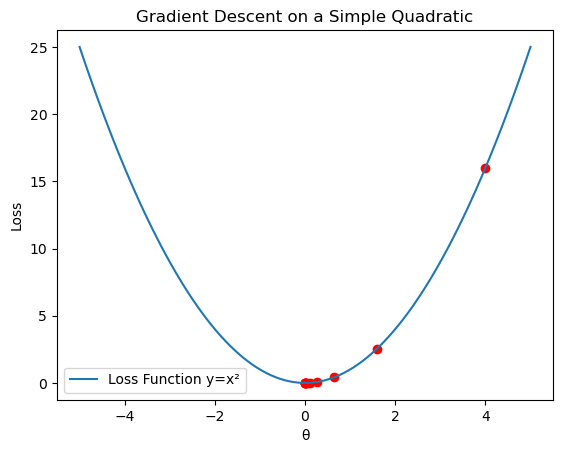

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define a simple convex function
x = np.linspace(-5, 5, 100)
y = x**2

# Simulate gradient descent
lr = 0.3
theta = 4
history = [theta]
for _ in range(10):
    grad = 2 * theta
    theta = theta - lr * grad
    history.append(theta)

plt.plot(x, y, label="Loss Function y=x²")
plt.scatter(history, [h**2 for h in history], c="red")
plt.title("Gradient Descent on a Simple Quadratic")
plt.xlabel("θ")
plt.ylabel("Loss")
plt.legend()
plt.show()

💡 **Tip**: decreasing learning rate too much slows convergence; too large makes it unstable.

## 🔹 Evaluation Metrics

Different problems require different metrics.

| Task | Metric | Intuition |
|------|--------|----------|
| **Classification** | Accuracy | % of correct predictions |
| | Precision/Recall/F1 | trade-offs in imbalanced data |
| | ROC-AUC | ability to rank positives over negatives |
| **Regression** | MSE/MAE | average prediction error |
| **Generation** | Perplexity, BLEU, ROUGE | quality of generated text |

### 🧠 Why metrics matter:
Optimization tells you how well you minimize loss, but evaluation tells you how useful the model is.

## 🧩 Playground: Logistic Regression on Iris Dataset

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load and split
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

## 🔹 Bias–Variance Tradeoff

- **Bias**: error from oversimplifying (underfitting).
- **Variance**: error from overreacting to noise (overfitting).
- **Goal**: find a balance — model complexity should match data complexity.

### 🧠 Rule of thumb: 
More complex models (deep nets) need more data and regularization.

## 📚 Further Reading

- Deep Learning (Goodfellow et al.)
- Scikit-learn Documentation
- CS229 Notes on Supervised Learning

---

# 🧩 Section 1 – NLP Basics

## 🧭 Learning Objectives

By the end of this section, you will:

- Understand what tokens and vocabularies are and why tokenization matters.
- Compare common tokenization algorithms (BPE, WordPiece, UnigramLM).
- Understand embeddings: what they are, how static and contextual embeddings differ, and why contextualization matters.
- Build a simple n-gram language model and compute perplexity.

## 🔹 1.1 Tokens & Vocabularies

A **token** is the smallest text unit a model processes.
**Tokenization** converts raw text into a sequence of discrete symbols (tokens).

### Example:

```
"Transformers are changing NLP!"
→ [Transformers, are, changing, NLP, !]
```

Different tokenization strategies trade off vocabulary size vs. expressiveness:

| Level | Example | Pros | Cons |
|-------|---------|------|------|
| **Character** | 't', 'r', 'a', ... | Handles any text | Very long sequences |
| **Word** | 'Transformers' | Intuitive | Huge vocabularies, OOV issues |
| **Subword** | 'transform', '##ers' | Balanced | Slightly complex preprocessing |

### 🧠 Key Idea:
Subword tokenization allows models to handle unseen words by composing them from smaller familiar units.

## 🧩 Playground — Inspecting Tokens

In [ ]:
from transformers import AutoTokenizer

text = "Transformers are changing NLP!"

for model in ["gpt2", "bert-base-uncased", "t5-small"]:
    tokenizer = AutoTokenizer.from_pretrained(model)
    tokens = tokenizer.tokenize(text)
    print(f"{model:20} → {tokens}")

**Observe** how each tokenizer splits text differently.

## 🔹 1.2 Tokenization Algorithms

### Byte-Pair Encoding (BPE) – [Sennrich et al., 2016]
Iteratively merges the most frequent pair of symbols into one unit.
→ used by GPT-2, RoBERTa.

### WordPiece – [Wu et al., 2016]
Similar to BPE but selects merges to maximize likelihood of training data.
→ used by BERT.

### Unigram Language Model – [Kudo 2018]
Starts with many candidate tokens and prunes those with low likelihood.
→ used by T5 and SentencePiece.

### 🧠 Why it matters:
Efficient tokenization reduces OOV errors and improves compression of information.

## 🔹 1.3 Embeddings — Representing Meaning as Vectors

After tokenization, each token is mapped to a numerical vector called an **embedding**.

### 🔸 Static Embeddings

Same vector for each word, regardless of context.

- **Examples**: Word2Vec, GloVe.
- Capture semantic similarity:
  - king – man + woman ≈ queen.

### 🔸 Contextual Embeddings

Representations depend on surrounding words.

- **Examples**: ELMo, BERT.
- The word "bank" gets different vectors in
  - "river bank" vs. "bank loan".

### 🧠 Mathematically:
A model learns an embedding matrix $E \in \mathbb{R}^{|V| \times d}$, where each row corresponds to a word vector of dimension $d$.

## 🧩 Playground — Compare Word2Vec and BERT Embeddings

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

sentence = "The king rules the kingdom"
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModel.from_pretrained("distilbert-base-uncased")

inputs = tokenizer(sentence, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)

print("Tokens:", tokenizer.tokenize(sentence))
print("Embedding shape:", outputs.last_hidden_state.shape)

💡 **Optional Exercise**: visualize embeddings with PCA/t-SNE to see clustering patterns.

### 📚 References:

- Word2Vec (Mikolov et al., 2013)
- GloVe (Pennington et al., 2014)
- ELMo (Peters et al., 2018)

## 🔹 1.4 n-gram Language Models & Perplexity

An **n-gram model** predicts the next word using the previous n – 1 words.

$P(w_t | w_{t-1}, \ldots, w_{t-n+1}) \approx \frac{C(w_{t-n+1}^t)}{C(w_{t-n+1}^{t-1})}$

where $C$ counts word occurrences.

**Perplexity (PPL)** measures predictive uncertainty:

$\text{PPL} = 2^{-\frac{1}{N} \sum_{i=1}^{N} \log_2 P(w_i | context)}$

Lower PPL → better predictions.

## 🧩 Playground — Train a Trigram LM

In [ ]:
import nltk
# Get the corpus + tokenizer data (both 'punkt' and 'punkt_tab' for newer NLTK)
nltk.download('reuters')
nltk.download('punkt')
nltk.download('punkt_tab')  # harmless if already present / on older NLTK

from nltk.corpus import reuters
from nltk.lm import MLE
from nltk.lm.preprocessing import padded_everygram_pipeline, pad_both_ends

# Prepare training sentences (lowercased)
sents = [list(map(str.lower, s)) for s in reuters.sents()[:2000]]

# Build 3-gram training stream with padding
n = 3
train_data, vocab = padded_everygram_pipeline(n, sents)

# Fit the model
lm = MLE(n)
lm.fit(train_data, vocab)

# Evaluate perplexity on a padded test sentence
test = ['the', 'market', 'is', 'volatile']
padded_test = list(pad_both_ends(test, n))
print("Perplexity on ['the','market','is','volatile'] →", lm.perplexity(padded_test))


### 🧠 Takeaway:
Before Transformers, such statistical LMs formed the foundation of NLP.
They inspired the concept of predicting words from context — a principle that remains central in modern LLMs.

### 📚 Further Reading

- Speech and Language Processing (Jurafsky & Martin)
- BPE Paper
- SentencePiece (UnigramLM)
- Hugging Face Tokenizers Docs

---

# ⚙️ Section 2 – Transformers Refresher

## 🧭 Learning Objectives

By the end of this section, you will:

- Recall why sequence models before Transformers (RNNs, LSTMs) struggled with long dependencies.
- Understand the architecture of the Transformer (encoder, decoder, attention).
- Grasp the key equations and intuition behind self-attention.
- Recognize the role of positional encoding and multi-head attention.
- See a mini-demo of attention in action.

## 🔹 2.1 From RNNs to Transformers

Before 2017, most NLP models used RNNs or LSTMs.
They processed sequences step-by-step, making them slow and prone to losing long-range information.

| Model | Limitation |
|-------|------------|
| **RNN** | Vanishing gradients, sequential computation |
| **LSTM/GRU** | Better memory but still sequential |
| **Transformer** | Fully parallel, learns long-range dependencies via attention |

### 🧠 Key Idea:
Instead of passing information through time steps, Transformers let every token attend to every other token directly.

## 🔹 2.2 The Transformer Architecture (Vaswani et al., 2017)

**Encoder–Decoder structure**:

- **Encoder**: converts input sequence → contextual representations.
- **Decoder**: generates output sequence using encoder context + previously generated tokens.

Each layer contains:

- Multi-Head Self-Attention
- Feed-Forward Network
- Layer Norm + Residual Connections

### 🧩 Simplified Diagram

```
Input Embeddings → [Self-Attention → FeedForward]×N → Encoder Output
Decoder Input → [Masked-Self-Attention + Cross-Attention + FeedForward]×N → Output logits
```

## 🔹 2.3 Self-Attention: Core Mechanism

Given token embeddings $x_i \in \mathbb{R}^d$, we compute three projections:

$Q = XW_Q, \quad K = XW_K, \quad V = XW_V$

Then each token attends to others:

$\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^\top}{\sqrt{d_k}}\right)V$

### 🧠 Intuition:

- **Q (Query)** asks: "What am I looking for?"
- **K (Key)** answers: "What do I contain?"
- **V (Value)** provides the actual information.

The dot-product similarity decides how much one token cares about another.

## 🧩 Playground — Tiny Attention Demo

In [ ]:
import torch
import torch.nn.functional as F

# 3 tokens, embedding dim 4
x = torch.randn(3, 4)
W_Q = torch.randn(4, 4)
W_K = torch.randn(4, 4)
W_V = torch.randn(4, 4)

Q, K, V = x @ W_Q, x @ W_K, x @ W_V
attn_scores = Q @ K.T / (4 ** 0.5)
attn_weights = F.softmax(attn_scores, dim=-1)
output = attn_weights @ V

print("Attention weights:\n", attn_weights)
print("Output shape:", output.shape)

💡 **Tip**: each row of attn_weights shows how strongly a token attends to the others.

## 🔹 2.4 Multi-Head Attention

Instead of one big attention map, Transformers use multiple heads that learn complementary relationships.

$\text{MHA}(Q, K, V) = \text{Concat}(\text{head}_1, \ldots, \text{head}_h)W^O$

### 🧠 Analogy: 
Multiple people reading a paragraph and focusing on different details—syntax, topic, entities.

## 🔹 2.5 Positional Encoding

Because attention has no inherent order awareness, we inject positional encodings:

$PE_{(pos,2i)} = \sin\left(\frac{pos}{10000^{2i/d}}\right), \quad PE_{(pos,2i+1)} = \cos\left(\frac{pos}{10000^{2i/d}}\right)$

### 🧠 Intuition: 
Adds a smooth notion of word order; adjacent positions have similar encodings.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def positional_encoding(seq_len=50, d=16):
    pos = np.arange(seq_len)[:, None]
    i = np.arange(d)[None, :]
    angles = pos / np.power(10000, (2*(i//2))/d)
    pe = np.zeros((seq_len, d))
    pe[:, 0::2] = np.sin(angles[:, 0::2])
    pe[:, 1::2] = np.cos(angles[:, 1::2])
    return pe

plt.imshow(positional_encoding(), aspect='auto', cmap='viridis')
plt.title("Positional Encoding Patterns")
plt.xlabel("Embedding Dimension")
plt.ylabel("Token Position")
plt.show()

## 🔹 2.6 Feed-Forward & Normalization Layers

Each attention block is followed by:

**A position-wise Feed-Forward Network**:

$\text{FFN}(x) = \text{ReLU}(xW_1 + b_1)W_2 + b_2$

**Residual connection + LayerNorm**

These help with stability and gradient flow.

## 🔹 2.7 Training Objective (Language Modeling)

Two major pretraining styles emerged:

| Model Type | Objective | Example |
|------------|-----------|----------|
| **Autoregressive** | Predict next token given past | GPT-series |
| **Masked LM** | Predict masked tokens | BERT |
| **Denoising Seq-to-Seq** | Reconstruct corrupted text | T5 |

We'll dive deeper into these in Section 3 – Language Models.

## 🔹 2.8 Why "Attention Is All You Need" Matters

- Enables full parallelization (no recurrence).
- Learns global dependencies efficiently.
- Scales to billions of parameters and diverse modalities (text, vision, speech).

### 🧠 Key Takeaway:
Transformers are a general-purpose architecture — not just for text but for anything that can be represented as a sequence of tokens or patches.

### 📚 Further Reading

- Vaswani et al., 2017 – Attention Is All You Need
- Illustrated Transformer – Jay Alammar
- Hugging Face Transformers Docs
- Annotated Transformer (Pytorch)

---

# 🗣️ Section 3 – Language Models

## 🧭 Learning Objectives

By the end of this section, you will:

- Understand what a language model is and how it assigns probabilities to sequences of text.
- Differentiate between small and large LMs, and how scaling affects their behavior.
- Grasp common pretraining objectives: Autoregressive (GPT), Masked (BERT), and Denoising (T5).
- Learn about data pipelines for pretraining and fine-tuning.
- Experiment with generating text and measuring perplexity.

## 🔹 3.1 What Is a Language Model?

A **Language Model (LM)** estimates the probability of a sequence of words (or tokens):

$P(w_1, w_2, \ldots, w_T) = \prod_{t=1}^{T} P(w_t | w_{<t})$

**Goal**: assign higher probabilities to valid sentences ("The cat sat on the mat")
and lower to unlikely ones ("Mat sat cat the on").

### 🧠 Intuition:
Language modeling teaches machines the structure, syntax, and semantics of a language — it's how LMs "understand" text statistically.

## 🔹 3.2 Small vs. Large Language Models

| Category | Example | Typical Size | Usage |
|----------|---------|--------------|-------|
| **Small** | DistilBERT, ALBERT, GPT-2-small | < 200M parameters | Task-specific fine-tuning |
| **Medium** | BERT-large, GPT-2-xl | 300M–1B | Good for academic tasks, lower compute |
| **Large** | GPT-3, PaLM, LLaMA 3, Claude 3 | 10B–>1T | General-purpose reasoning, few-shot learning |

### 🧠 Scaling Law Insight (Kaplan et al., 2020):
Performance improves predictably with model size, data, and compute, following power laws — until you run out of high-quality data.

## 🔹 3.3 Pretraining Objectives

### 🔸 (a) Autoregressive Language Modeling (GPT)

Predict the next token given all previous ones:

$L_{AR} = -\sum_t \log P(w_t | w_{<t})$

**Used by**: GPT, LLaMA, Mistral

🧠 **Generative direction**: left → right

💬 **Example**: Given "The sky is", predict "blue".

### 🔸 (b) Masked Language Modeling (MLM – BERT)

Randomly mask ~15% of tokens, and train model to predict them:

$L_{MLM} = -\sum_{i \in M} \log P(w_i | w_{\setminus M})$

**Used by**: BERT, RoBERTa, DeBERTa

🧠 **Bidirectional context**: both left and right sides are visible.

💬 **Example**: "The [MASK] is blue" → predict "sky".

### 🔸 (c) Denoising Autoencoding (T5-style)

Corrupt spans of text (not just words) and train to reconstruct them:

```
Input: "The sky is <mask_0>"     Target: "blue"
```

**Used by**: T5, BART

🧠 **Seq-to-seq framing** allows flexible pretraining for multiple downstream tasks.

## 🔹 3.4 Data Pipelines: Collection → Cleaning → Tokenization

Modern LLM training requires massive, high-quality text corpora.

### Typical Pipeline:

1. **Collection**
   - Web crawl (Common Crawl, Wikipedia, books, code)
   - Domain-specific datasets (arXiv, StackExchange, etc.)

2. **Cleaning & Filtering**
   - Remove duplicates, profanity, spam, boilerplate.
   - Filter by language, readability, and toxicity (using heuristics or classifiers).

3. **Tokenization**
   - Apply BPE/WordPiece/Unigram.
   - Produce compact integer sequences for model input.

4. **Sharding & Streaming**
   - Split into ~1GB shards for distributed training.
   - Stream efficiently using frameworks like 🤗 Datasets.

### 🧠 Practical Tip:
The quality of data affects LLM performance more than sheer quantity after a certain scale.

## 🔹 3.5 Playground — Text Generation Demo (Autoregressive)

Let's generate text using a pretrained autoregressive LM:

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

model_name = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

prompt = "Artificial intelligence is"
inputs = tokenizer(prompt, return_tensors="pt")

output = model.generate(**inputs, max_length=40, temperature=0.8, top_p=0.9, do_sample=True)
print(tokenizer.decode(output[0], skip_special_tokens=True))

💡 **Try adjusting**:
- `temperature`: randomness of sampling
- `top_p`: nucleus sampling cutoff
- `max_length`: generation length

## 🔹 3.6 Playground — Perplexity Evaluation

Perplexity measures how well a model predicts a sequence (lower is better):

In [ ]:
import math
from datasets import load_dataset
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

dataset = load_dataset("wikitext", "wikitext-2-raw-v1", split="test[:1%]")
encodings = tokenizer("\n\n".join(dataset["text"]), return_tensors="pt")

max_length = model.config.n_positions
stride = 512
nlls = []

for i in range(0, encodings.input_ids.size(1), stride):
    begin_loc = max(i + stride - max_length, 0)
    end_loc = min(i + stride, encodings.input_ids.size(1))
    input_ids = encodings.input_ids[:, begin_loc:end_loc]
    target_ids = input_ids.clone()
    target_ids[:, :-stride] = -100  # mask out context tokens

    with torch.no_grad():
        outputs = model(input_ids, labels=target_ids)
        nll = outputs.loss * stride
    nlls.append(nll)

ppl = torch.exp(torch.stack(nlls).sum() / end_loc)
print(f"Perplexity: {ppl.item():.2f}")

## 🔹 3.7 Practical Uses of Language Models

- Autocompletion (e.g., code, text)
- Summarization, translation, question answering
- Information retrieval and RAG (retrieval-augmented generation)
- Conversational agents (like ChatGPT!)
- Few-shot reasoning and tool use

### 🧠 Key Insight:
A pretrained LM captures broad language knowledge.
Fine-tuning or prompting adapts it to specific tasks — this is the bridge from foundation model → application model.

### 📚 Further Reading

- GPT Paper – Radford et al. (2018)
- BERT Paper – Devlin et al. (2019)
- T5 Paper – Raffel et al. (2020)
- The Scaling Laws for Neural Language Models (Kaplan et al., 2020)
- Hugging Face Datasets

---

# 🧩 Section 4 – Fine-Tuning and Parameter-Efficient Adaptation

## 🧭 Learning Objectives

By the end of this section, you will:

- Understand the difference between full fine-tuning and parameter-efficient tuning.
- Learn the concepts of prompt-tuning, prefix-tuning, and LoRA/adapters.
- See small code demos of fine-tuning a model for classification tasks.
- Understand when to use each method for efficiency, memory, and compute constraints.

## 🔹 4.1 Full Fine-Tuning

Full fine-tuning updates **all parameters** of a pretrained LM for a downstream task.

**Pros**: Maximum flexibility; usually gives best performance.

**Cons**: Very memory-intensive for large LMs; retraining each time for new tasks.

💡 **Example Use Case**: Fine-tuning GPT-2 or BERT for sentiment analysis on IMDB dataset.

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset

# Load small subset for demo
dataset = load_dataset("imdb", split="train[:1%]").train_test_split(test_size=0.2)

# Model & tokenizer
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Preprocess
def preprocess(examples):
    return tokenizer(examples["text"], truncation=True, padding="max_length", max_length=128)
encoded = dataset.map(preprocess, batched=True)

# Trainer setup
args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=4,
    num_train_epochs=1,
    logging_steps=5,
)
trainer = Trainer(model=model, args=args, train_dataset=encoded["train"], eval_dataset=encoded["test"])
trainer.train()

💡 **Observation**: Full fine-tuning works well for smaller models, but is impractical for billion-parameter LLMs.

## 🔹 4.2 Prompt-Tuning

Prompt-tuning **freezes** the model parameters and learns small task-specific embeddings (the "soft prompt") prepended to the input.

**Pros**: Extremely memory efficient; easy to swap prompts for new tasks.

**Cons**: Slightly lower performance than full fine-tuning.

### 🧠 Analogy: 
Think of giving the model a special hint before it reads your text.

## 🔹 4.3 Prefix-Tuning

Similar to prompt-tuning, but adds learnable vectors to **every layer** of the Transformer (prefix).

- Works better than plain prompt-tuning for large models.
- Still parameter-efficient, training only a fraction of total weights.

## 🔹 4.4 LoRA (Low-Rank Adaptation)

LoRA injects low-rank matrices into pretrained weights:

$W' = W + \Delta W, \quad \Delta W = AB, \quad \text{rank}(A), \text{rank}(B) \ll d$

**Pros**: Fine-tune large models with minimal GPU memory.

**Cons**: Requires compatible frameworks (Hugging Face PEFT, DeepSpeed).

💡 **Key idea**: You don't touch the main weights; you just learn small "delta" matrices.

## 🔹 4.5 Adapters

Add small feed-forward networks inside each layer of the Transformer.

- Only adapter weights are trained; the main LM remains frozen.
- Very similar in concept to LoRA but often layer-specific.

## 🔹 4.6 Choosing the Right Method

| Method | Memory | Flexibility | When to Use |
|--------|--------|-------------|-------------|
| **Full Fine-Tuning** | High | High | Small-medium models, max accuracy |
| **Prompt-Tuning** | Very Low | Medium | Many tasks, low compute |
| **Prefix-Tuning** | Low | Medium | Medium-large models |
| **LoRA/Adapters** | Low | High | Large models, multi-task or frequent updates |

## 🧩 Playground – LoRA Fine-Tuning with PEFT

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, Trainer, TrainingArguments
from peft import LoraConfig, get_peft_model

# Load model
model_name = "distilgpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Configure LoRA
lora_config = LoraConfig(
    r=4, lora_alpha=16, target_modules=["c_attn"], lora_dropout=0.1, bias="none", task_type="CAUSAL_LM"
)
model = get_peft_model(model, lora_config)

# Dummy data
texts = ["Hello world", "Machine learning is fun"]
inputs = tokenizer(texts, return_tensors="pt", padding=True)
labels = inputs.input_ids.clone()

# Simple forward pass
outputs = model(**inputs, labels=labels)
print("Loss:", outputs.loss.item())

💡 **Observation**: LoRA allows us to fine-tune GPT-2 small with just a fraction of parameters.

## 🔹 4.7 Key Takeaways

- **Full fine-tuning**: flexible but expensive.
- **Prompt/Prefix tuning**: cheap, good for multi-task pipelines.
- **LoRA/Adapters**: optimal for large LMs; you train small delta matrices.
- Efficient methods enable multi-task use and frequent updates without retraining the full model.

### 📚 References

- LoRA Paper – Hu et al., 2021
- Prefix-Tuning – Li & Liang, 2021
- Prompt-Tuning – Lester et al., 2021
- Hugging Face PEFT Docs

---

# 🧩 Section 5 – Inference Strategies and RAG

## 🧭 Learning Objectives

By the end of this section, you will:

- Understand how LLMs generate text and the key parameters affecting output.
- Learn sampling strategies: greedy, beam search, temperature, top-k, top-p (nucleus).
- Explore context windows and memory augmentation.
- Understand retrieval-augmented generation (RAG) and its practical usage.

## 🔹 5.1 Generating Text with LLMs

A pretrained LM outputs logits over the vocabulary for the next token.
Generation involves selecting a token at each step and feeding it back as input.

### Key concepts:

- **Greedy decoding**: pick token with max probability. Simple but deterministic.
- **Sampling**: randomly pick according to probabilities. Adds creativity.
- **Beam search**: maintain multiple top sequences to balance probability and diversity.

## 🔹 5.2 Sampling Strategies

| Strategy | How It Works | Pros | Cons |
|----------|--------------|------|------|
| **Greedy** | argmax token each step | Fast, deterministic | Can be repetitive, low diversity |
| **Beam Search** | Keep top-k sequences at each step | Higher quality | Slower, may overfit to high-prob sequences |
| **Temperature** | Scale logits by 1/T before softmax | Controls randomness | T too high → gibberish |
| **Top-k** | Only sample from top k tokens | Reduces low-prob tokens | k too low → repetitive |
| **Top-p (nucleus)** | Sample from smallest set with cumulative prob ≥ p | Dynamic, better diversity | Slightly slower |

## 🔹 5.3 Playground — Text Generation with Sampling

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model_name = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

prompt = "In the future, AI will"
inputs = tokenizer(prompt, return_tensors="pt")

# Greedy decoding
greedy_output = model.generate(**inputs, max_length=40)
print("Greedy:", tokenizer.decode(greedy_output[0], skip_special_tokens=True))

# Top-p sampling
top_p_output = model.generate(**inputs, max_length=40, do_sample=True, top_p=0.9, temperature=0.8)
print("Top-p Sampling:", tokenizer.decode(top_p_output[0], skip_special_tokens=True))

💡 **Tip**: Experiment with temperature, top-k, and top-p to see how randomness affects creativity.

## 🔹 5.4 Context Window & Memory

- **Context window**: maximum number of tokens a model can see at once.
- Longer context allows richer understanding, but increases memory usage.
- For very long documents, models may truncate input or use sliding windows.
- **Memory & Retrieval Augmentation**: LLMs can query external knowledge to extend context beyond their native window.

## 🔹 5.5 Retrieval-Augmented Generation (RAG)

**Idea**: Combine LLM with an external knowledge base for better factual accuracy.

### Pipeline:

1. Query embedding → search in vector database (FAISS, Milvus, Pinecone).
2. Retrieve top-k relevant documents.
3. Concatenate with prompt → feed to LLM.
4. Generate answer using both model knowledge + retrieved context.

## 🔹 5.6 Playground — RAG with Hugging Face + FAISS

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline
from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings

# Dummy documents
docs = ["AI can generate text.", "Transformers replaced RNNs.", "BERT uses masked language modeling."]
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
vectorstore = FAISS.from_texts(docs, embeddings)

query = "How does BERT work?"
retrieved = vectorstore.similarity_search(query, k=2)

# Show retrieved context
print("Retrieved:", [d.page_content for d in retrieved])

# Use retrieved context for generation
prompt = query + " Context: " + " ".join([d.page_content for d in retrieved])
tokenizer = AutoTokenizer.from_pretrained("t5-small")
model = AutoModelForSeq2SeqLM.from_pretrained("t5-small")
inputs = tokenizer(prompt, return_tensors="pt")
outputs = model.generate(**inputs, max_length=50)
print("Generated Answer:", tokenizer.decode(outputs[0], skip_special_tokens=True))

💡 **Observation**: RAG improves factual grounding without retraining the model.

## 🔹 5.7 Key Takeaways

- LLM outputs are probabilistic, and generation quality depends on decoding strategy.
- Top-p / temperature sampling gives more diverse outputs than greedy or beam search.
- RAG augments context beyond the model's native memory, improving factuality.
- Vector databases + embeddings make retrieval fast and scalable.

### 📚 References

- LangChain Docs
- FAISS – Facebook AI Similarity Search
- Hugging Face Retrieval + RAG
- Top-p / Top-k sampling explanation

---

# 🧩 Section 6 – Scaling and Efficiency Techniques

## 🧭 Learning Objectives

By the end of this section, you will:

- Understand the tradeoffs between model size, compute, and performance.
- Learn practical strategies for memory-efficient training and inference.
- Be aware of distillation, quantization, and parameter-efficient tuning techniques.

## 🔹 6.1 Model Size Tradeoffs

| Aspect | Small Model | Large Model |
|--------|-------------|-------------|
| **Parameters** | Few million → <200M | Billions → >1T |
| **FLOPs** | Low | Very high |
| **Training Data** | Modest | Massive |
| **Generalization** | Task-specific | Broad, few-shot/flexible |
| **Inference Cost** | Cheap | Expensive (GPU/TPU) |

💡 **Rule of Thumb**: Bigger models perform better but require careful compute/memory planning.

## 🔹 6.2 FLOPs, Batching & Mixed Precision

- **FLOPs (Floating Point Operations)**: total compute per forward/backward pass.
- **Batching**: processing multiple sequences together amortizes compute; larger batch → faster training (but more memory).
- **Mixed Precision (FP16 / bfloat16)**: halves memory usage, doubles throughput, minimal loss in accuracy.

In [ ]:
# Example: Enabling mixed precision in PyTorch Trainer
from transformers import Trainer, TrainingArguments

args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=8,
    fp16=True,  # mixed precision
    num_train_epochs=1
)

## 🔹 6.3 Memory Optimization

| Technique | Description |
|-----------|-------------|
| **Gradient Checkpointing** | Save memory by recomputing activations during backward pass |
| **Gradient Accumulation** | Simulate large batch size by accumulating gradients over multiple steps |
| **Activation Offloading** | Move intermediate activations to CPU or disk |

💡 These techniques make training large models feasible on limited GPUs.

## 🔹 6.4 Distillation & Quantization

- **Distillation**: Train a smaller "student" model to mimic a larger "teacher" → faster, lighter, still high-quality.
- **Quantization**: Reduce weight precision (e.g., FP32 → INT8/INT4) → smaller memory footprint, faster inference.

## 🔹 6.5 Parameter-Efficient Tuning Recap

- LoRA, adapters, prompt/prefix tuning allow large LMs to adapt without full fine-tuning.
- Reduces memory usage, training time, and storage for multiple tasks.

## 🔹 6.6 Key Takeaways

- Scaling up increases performance but requires FLOPs, memory, and infrastructure planning.
- Efficiency hacks (mixed precision, checkpointing, accumulation) make large-scale training practical.
- Distillation/quantization and parameter-efficient tuning allow deployment on edge devices or multiple tasks.

### 📚 References

- Hugging Face Accelerate
- Mixed Precision in PyTorch
- DistilBERT Paper
- LoRA Paper

---

# 🧩 Section 7 – Evaluation & Metrics

## 🧭 Learning Objectives

By the end of this section, you will:

- Understand intrinsic vs extrinsic evaluation metrics for LLMs.
- Learn how perplexity, token accuracy, BLEU/ROUGE, F1, and AUROC work.
- Gain insight into calibration and hallucination detection.
- Explore explainability tools like attention probes and saliency maps.

## 🔹 7.1 Intrinsic vs Extrinsic Metrics

| Type | Measures | Use Case |
|------|----------|----------|
| **Intrinsic** | Model's internal predictive quality | Language modeling, token prediction |
| **Extrinsic** | Downstream task performance | QA, summarization, translation |

## 🔹 7.2 Intrinsic Metrics

### Perplexity (PPL):

$\text{PPL} = 2^{-\frac{1}{N}\sum_{i=1}^{N} \log_2 P(w_i|\text{context})}$

Lower is better; measures how well the LM predicts the next token.

### Token Accuracy: 
Proportion of correctly predicted tokens (mostly for masked or autoregressive LM evaluation).

💡 **Intuition**: Intrinsic metrics measure language modeling skill, independent of any specific task.

## 🔹 7.3 Extrinsic Metrics

| Task | Metric | Description |
|------|--------|-------------|
| **Translation / Summarization** | BLEU, ROUGE | Compare generated text vs reference |
| **Classification** | F1, Accuracy | Task-specific correctness |
| **Retrieval / QA** | Exact Match, F1 | Match predicted answer to ground truth |
| **General** | AUROC | For probabilistic classification, measures ranking quality |

💡 **Tip**: Always pair intrinsic + extrinsic metrics for full evaluation.

## 🔹 7.4 Calibration & Hallucination

- **Calibration**: Do predicted probabilities reflect true likelihood?
- **Hallucination**: When LLM generates plausible but incorrect information.
- **Techniques to mitigate**:
  - Prompting with factual context (RAG)
  - Post-hoc verification
  - Using uncertainty scores or multiple hypotheses

## 🔹 7.5 Explainability Tools

| Method | Description |
|--------|-------------|
| **Attention Probes** | Visualize attention weights to see which tokens influence output |
| **Saliency Maps / Gradients** | Measure how input tokens affect predictions |
| **Integrated Gradients** | Attribute prediction score to input features |

In [ ]:
# Example: Visualizing attention weights from BERT
from transformers import AutoModel, AutoTokenizer
import torch
import matplotlib.pyplot as plt

model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name, output_attentions=True)

text = "Transformers are changing NLP"
inputs = tokenizer(text, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)
attentions = outputs.attentions  # tuple of attention matrices

# Visualize first layer, first head
plt.matshow(attentions[0][0][0].numpy())
plt.title("Attention weights: Layer 1, Head 1")
plt.xlabel("Token Position")
plt.ylabel("Token Position")
plt.show()

💡 **Observation**: You can see which words "attend" to which, helping interpret model behavior.

## 🔹 7.6 Key Takeaways

- Intrinsic metrics evaluate language modeling; extrinsic metrics evaluate downstream task performance.
- Calibration and hallucination detection are crucial for safe LLM deployment.
- Explainability helps debug and understand model decisions, building trust.

### 📚 References

- Perplexity & Language Modeling
- BLEU Paper
- ROUGE Paper
- Interpretability in Transformers – Vig, 2019
- LLM Hallucination Analysis – Ji et al., 2023